In [2]:
import pandas as pd
import numpy as np

In [2]:
#with open('flights.csv','r') as file:
#    data = file.read().rstrip(',')

In [3]:
#from io import StringIO
#data_flights = pd.read_csv(StringIO(data))

In [3]:
flights = pd.read_csv('flights.csv', index_col=False)

In [5]:
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2017,1,18,3,2017-01-18,19977,N426UA,RNO,"Reno, NV",Nevada,...,17.0,6.0,903,844.0,0.0,0.0,138.0,130.0,107.0,804.0
1,2017,1,19,4,2017-01-19,20366,N371CA,LGA,"New York, NY",New York,...,32.0,4.0,2242,2236.0,0.0,0.0,222.0,189.0,153.0,1107.0
2,2017,1,22,7,2017-01-22,19393,N7829B,BWI,"Baltimore, MD",Maryland,...,8.0,5.0,1230,1254.0,0.0,0.0,60.0,53.0,40.0,220.0
3,2017,1,12,4,2017-01-12,19790,N915AT,JFK,"New York, NY",New York,...,27.0,7.0,1135,1112.0,0.0,0.0,145.0,131.0,97.0,636.0
4,2017,1,30,1,2017-01-30,20409,N659JB,MCO,"Orlando, FL",Florida,...,14.0,3.0,1405,1354.0,0.0,0.0,159.0,154.0,137.0,1072.0


Data cleaning

In [6]:
flights['DISTANCE'].describe()

count    600000.000000
mean        855.988945
std         623.733127
min          31.000000
25%         391.000000
50%         680.000000
75%        1097.000000
max        4983.000000
Name: DISTANCE, dtype: float64

In [7]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
AIRLINE_ID               int64
TAIL_NUM                object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_NM         object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
TAXI_OUT               float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
dtype: object

In [8]:
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])

In [9]:
flights.dtypes

YEAR                            int64
MONTH                           int64
DAY_OF_MONTH                    int64
DAY_OF_WEEK                     int64
FL_DATE                datetime64[ns]
AIRLINE_ID                      int64
TAIL_NUM                       object
ORIGIN                         object
ORIGIN_CITY_NAME               object
ORIGIN_STATE_NM                object
DEST                           object
DEST_CITY_NAME                 object
DEST_STATE_NM                  object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
TAXI_OUT                      float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
CANCELLED                     float64
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
dtype: object

In [10]:
flights['CANCELLED'] = flights['CANCELLED'].astype(np.bool)
flights['DIVERTED'] = flights['DIVERTED'].astype(np.bool)

In [11]:
flights.dtypes

YEAR                            int64
MONTH                           int64
DAY_OF_MONTH                    int64
DAY_OF_WEEK                     int64
FL_DATE                datetime64[ns]
AIRLINE_ID                      int64
TAIL_NUM                       object
ORIGIN                         object
ORIGIN_CITY_NAME               object
ORIGIN_STATE_NM                object
DEST                           object
DEST_CITY_NAME                 object
DEST_STATE_NM                  object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
TAXI_OUT                      float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
CANCELLED                        bool
DIVERTED                         bool
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
dtype: object

In [12]:
#Drop the redundant columns (year, month, day of month)
#flights.drop(columns=['YEAR', 'MONTH','DAY_OF_MONTH'], inplace=True)

In [13]:
flights.dtypes

DAY_OF_WEEK                     int64
FL_DATE                datetime64[ns]
AIRLINE_ID                      int64
TAIL_NUM                       object
ORIGIN                         object
ORIGIN_CITY_NAME               object
ORIGIN_STATE_NM                object
DEST                           object
DEST_CITY_NAME                 object
DEST_STATE_NM                  object
CRS_DEP_TIME                    int64
DEP_TIME                      float64
TAXI_OUT                      float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
CANCELLED                        bool
DIVERTED                         bool
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
dtype: object

In [14]:
#rename columns
flights.rename(columns={'DEST':'DESTINATION'}, inplace=True)    # dictionary is gonna tell us what columns we are starting from, 
                                                # what column do we want to map the new name to
                                                # all the keys represent columns that are in the database

In [15]:
flights.tail()

,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DESTINATION,DEST_CITY_NAME,DEST_STATE_NM,...,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
599995,3,2017-12-06,19690,N489HA,ITO,"Hilo, HI",Hawaii,OGG,"Kahului, HI",Hawaii,...,8.0,5.0,1052,1038.0,False,False,41.0,38.0,25.0,121.0
599996,1,2017-12-04,20409,N639JB,LGB,"Long Beach, CA",California,SLC,"Salt Lake City, UT",Utah,...,11.0,4.0,1822,1811.0,False,False,102.0,93.0,78.0,588.0
599997,5,2017-12-22,20436,N721FR,LAS,"Las Vegas, NV",Nevada,STL,"St. Louis, MO",Missouri,...,13.0,9.0,507,453.0,False,False,192.0,182.0,160.0,1371.0
599998,5,2017-12-22,19805,N112AA,PHL,"Philadelphia, PA",Pennsylvania,PIT,"Pittsburgh, PA",Pennsylvania,...,12.0,5.0,2204,2159.0,False,False,79.0,65.0,48.0,268.0
599999,7,2017-12-10,19977,N73270,MCO,"Orlando, FL",Florida,DEN,"Denver, CO",Colorado,...,9.0,7.0,1007,942.0,False,False,248.0,229.0,213.0,1546.0


In [27]:
#Null values
print(flights.isnull().sum())

YEAR                      0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
AIRLINE_ID                0
TAIL_NUM               1287
ORIGIN                    0
ORIGIN_CITY_NAME          0
ORIGIN_STATE_NM           0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_NM             0
CRS_DEP_TIME              0
DEP_TIME               8290
TAXI_OUT               8485
TAXI_IN                8731
CRS_ARR_TIME              0
ARR_TIME               8731
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME    9866
AIR_TIME               9866
DISTANCE                  0
dtype: int64


In [17]:
#difference in CRS department time and actual time
print(flights['CRS_DEP_TIME']-flights['DEP_TIME'])

0         11.0
1        -27.0
2        -71.0
3          9.0
4          6.0
          ... 
599995    11.0
599996     2.0
599997     4.0
599998    -9.0
599999     6.0
Length: 600000, dtype: float64


Notice that in DEP_TIME column are 8290 null values, but the last output gave the full result to those values

In [19]:
#drop NaN/null/missing values
print((flights['CRS_DEP_TIME']-flights['DEP_TIME']).dropna())

0         11.0
1        -27.0
2        -71.0
3          9.0
4          6.0
          ... 
599995    11.0
599996     2.0
599997     4.0
599998    -9.0
599999     6.0
Length: 591710, dtype: float64


## Plot

<Axes: >

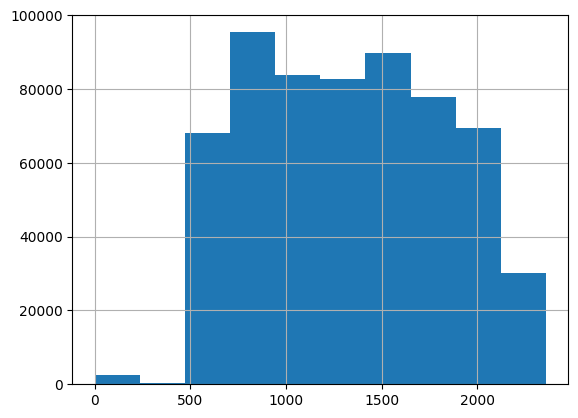

In [20]:
#histogram of expected departure times

flights['CRS_DEP_TIME'].hist()

<Axes: >

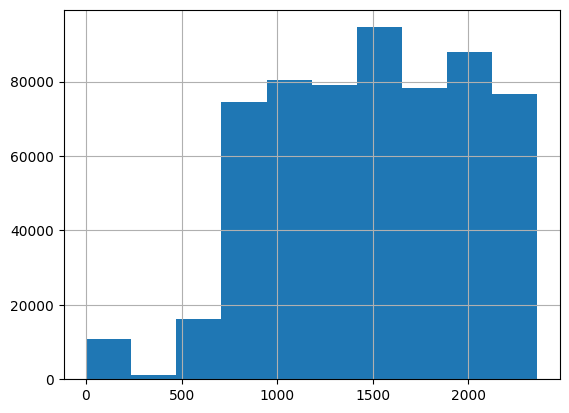

In [21]:
#crs arrival time
flights['CRS_ARR_TIME'].hist()

<Axes: xlabel='MONTH'>

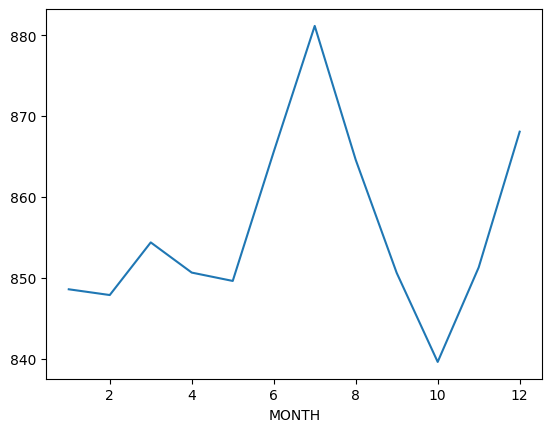

In [26]:
#plot average distance that flights travel by month

#create a groupby element (groups the DF by col)
flights_by_month = flights.groupby('MONTH') 

#in the grouped data "groupbyDF[Column]" do this(np.mean), and plot it 
flights_by_month['DISTANCE'].aggregate('mean').plot() #



<Axes: xlabel='DAY_OF_WEEK'>

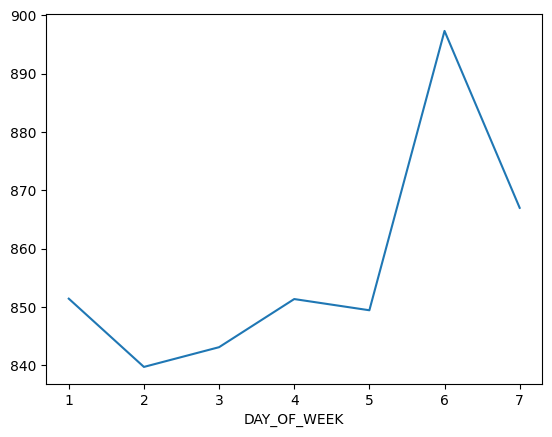

In [30]:
#plot the average distance of flight travel by day of the week

flights_dotw =flights.groupby('DAY_OF_WEEK')

#in the grouped data "groupbyDF[Column]" do this(np.mean), and plot it 
flights_dotw['DISTANCE'].aggregate('mean').plot()


In [4]:
#Joining data from two different DF
#as DAY_OF_WEEK is a number in flights, we can join it with another DF where 
#for each number, a string corresponds

#load the mapping CSV File (days of week)
days_of_week = pd.read_csv('L_WEEKDAYS.csv', index_col=False)


In [20]:
#Merge flights with days_of_week DF

merged = pd.merge(flights, days_of_week, left_on='DAY_OF_WEEK', right_on='Code')

In [21]:
merged

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Code,Description
0,2017,1,18,3,2017-01-18,19977,N426UA,RNO,"Reno, NV",Nevada,...,903,844.0,0.0,0.0,138.0,130.0,107.0,804.0,3,Wednesday
1,2017,1,19,4,2017-01-19,20366,N371CA,LGA,"New York, NY",New York,...,2242,2236.0,0.0,0.0,222.0,189.0,153.0,1107.0,4,Thursday
2,2017,1,22,7,2017-01-22,19393,N7829B,BWI,"Baltimore, MD",Maryland,...,1230,1254.0,0.0,0.0,60.0,53.0,40.0,220.0,7,Sunday
3,2017,1,12,4,2017-01-12,19790,N915AT,JFK,"New York, NY",New York,...,1135,1112.0,0.0,0.0,145.0,131.0,97.0,636.0,4,Thursday
4,2017,1,30,1,2017-01-30,20409,N659JB,MCO,"Orlando, FL",Florida,...,1405,1354.0,0.0,0.0,159.0,154.0,137.0,1072.0,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2017,12,6,3,2017-12-06,19690,N489HA,ITO,"Hilo, HI",Hawaii,...,1052,1038.0,0.0,0.0,41.0,38.0,25.0,121.0,3,Wednesday
599996,2017,12,4,1,2017-12-04,20409,N639JB,LGB,"Long Beach, CA",California,...,1822,1811.0,0.0,0.0,102.0,93.0,78.0,588.0,1,Monday
599997,2017,12,22,5,2017-12-22,20436,N721FR,LAS,"Las Vegas, NV",Nevada,...,507,453.0,0.0,0.0,192.0,182.0,160.0,1371.0,5,Friday
599998,2017,12,22,5,2017-12-22,19805,N112AA,PHL,"Philadelphia, PA",Pennsylvania,...,2204,2159.0,0.0,0.0,79.0,65.0,48.0,268.0,5,Friday


In [22]:
#remove DAY_OF_WEEK and Code Columns (inplace=True)
merged.drop(columns=['DAY_OF_WEEK','Code'],inplace=True)


In [23]:
#rename Description -> DAY_OF_WEEK
merged.rename(columns={'Description':'DAY_OF_WEEK'}, inplace=True)

In [25]:
merged.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE', 'AIRLINE_ID', 'TAIL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST',
       'DEST_CITY_NAME', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'CANCELLED',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'DAY_OF_WEEK'],
      dtype='object')

Statistics

In [26]:
import pandas as pd

flights = pd.read_csv('flights.csv', index_col=False)

In [27]:
print(flights.describe())

           YEAR          MONTH   DAY_OF_MONTH    DAY_OF_WEEK     AIRLINE_ID  \
count  600000.0  600000.000000  600000.000000  600000.000000  600000.000000   
mean     2017.0       6.500000      15.754290       3.939985   19899.020618   
std         0.0       3.452055       8.770601       1.992246     380.180746   
min      2017.0       1.000000       1.000000       1.000000   19393.000000   
25%      2017.0       3.750000       8.000000       2.000000   19790.000000   
50%      2017.0       6.500000      16.000000       4.000000   19805.000000   
75%      2017.0       9.250000      23.000000       6.000000   20304.000000   
max      2017.0      12.000000      31.000000       7.000000   21171.000000   

        CRS_DEP_TIME       DEP_TIME       TAXI_OUT        TAXI_IN  \
count  600000.000000  591710.000000  591515.000000  591269.000000   
mean     1328.973407    1332.588608      16.759212       7.485439   
std       490.607959     503.988007       9.355301       5.833366   
min         

In [28]:
print(flights['DISTANCE'].mean())

855.988945


In [36]:
#Final

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [33]:
flights_subsample = flights.sample(1000)
flights_subsample.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
308267,2017,7,30,7,2017-07-30,19790,N940AT,MSP,"Minneapolis, MN",Minnesota,...,22.0,6.0,1647,1635.0,0.0,0.0,157.0,153.0,125.0,930.0
485457,2017,10,16,1,2017-10-16,20416,N901NK,PHX,"Phoenix, AZ",Arizona,...,14.0,4.0,500,511.0,0.0,0.0,130.0,125.0,107.0,868.0
580304,2017,12,15,5,2017-12-15,19790,N774DE,CVG,"Cincinnati, OH",Kentucky,...,19.0,4.0,735,718.0,0.0,0.0,105.0,90.0,67.0,373.0
371995,2017,8,23,3,2017-08-23,20409,N947JB,JFK,"New York, NY",New York,...,25.0,16.0,1624,1605.0,0.0,0.0,389.0,377.0,336.0,2586.0
568149,2017,12,15,5,2017-12-15,19977,N16217,ORD,"Chicago, IL",Illinois,...,21.0,9.0,2241,2248.0,0.0,0.0,86.0,97.0,67.0,334.0


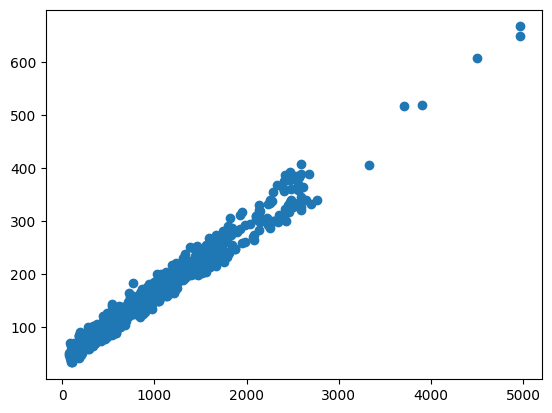

In [37]:
plt.scatter(flights_subsample['DISTANCE'], flights_subsample['CRS_ELAPSED_TIME'])
plt.show()

In [39]:
#Perform Linear Regression

slope, intercept, r_value, _,_ = linregress(flights_subsample['DISTANCE'], flights_subsample['CRS_ELAPSED_TIME'])
print('y = {}x + {};r={}'.format(slope, intercept, r_value))

y = 0.12322990845505087x + 41.62467136312651;r=0.9861437636838701


In [42]:
#generate X values to feed into the line

x = np.linspace(flights_subsample['DISTANCE'].min(),flights_subsample['DISTANCE'].max(), 1000)
y = x*slope+intercept

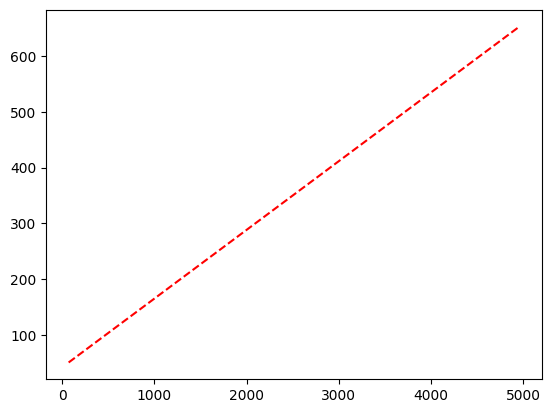

In [45]:
plt.plot(x,y, 'r--')

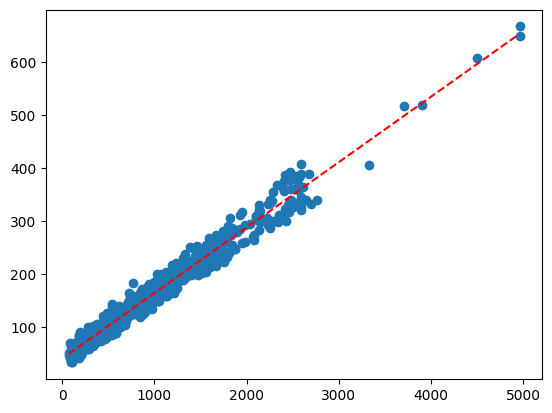

In [47]:
plt.scatter(flights_subsample['DISTANCE'], flights_subsample['CRS_ELAPSED_TIME'])
plt.plot(x,y, 'r--')
plt.show()